In [158]:
# loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [159]:
# Loading the dataset from the Excel file
trans=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions',skiprows=0,header=1)
newCustomer=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList',skiprows=0,header=1)
customer=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name= 'CustomerDemographic',skiprows=0,header=1)
address=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress',skiprows=0,header=1)

In [160]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [161]:
trans.isnull().sum().sort_values()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
order_status                 0
list_price                   0
brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197
online_order               360
dtype: int64

In [162]:
cust_id_table=pd.DataFrame({'trans':trans.customer_id.unique().shape,'customer':customer.customer_id.unique().shape,'address':address.customer_id.unique().shape})

In [163]:
cust_id_table

,trans,customer,address
0,3494,4000,3999


In [164]:
trans.customer_id.unique().shape

(3494,)

In [165]:
result =set(trans.customer_id.unique()).intersection(customer.customer_id.unique())
len(result)


3493

In [166]:
result1 =set(trans.customer_id.unique()).intersection(address.customer_id.unique())
len(result1)

3489

In [167]:
result1=list(result1)
result1

[1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,

In [168]:
r1=pd.DataFrame({'customer_id':result1})
r1

,customer_id
0,1
1,2
2,4
3,5
4,6
...,...
3484,3496
3485,3497
3486,3498
3487,3499


In [169]:
result2 =set(customer.customer_id.unique()).intersection(address.customer_id.unique())
len(result2)

3996

In [170]:
r2=list(result2)
r2=pd.DataFrame({'customer_id':r2})
r2

,customer_id
0,1
1,2
2,4
3,5
4,6
...,...
3991,3996
3992,3997
3993,3998
3994,3999


In [171]:
s1=pd.merge(customer,r1,how='inner',on="customer_id")

In [172]:
s1.shape

(3489, 13)

In [173]:
s2=pd.merge(address,s1,how='inner',on='customer_id')
s2.shape

(3489, 18)

In [174]:
s2.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,4,0 Holy Cross Court,4211,QLD,Australia,9,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
4,6,9 Oakridge Court,3216,VIC,Australia,9,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0


In [175]:
s2.drop(['default','country','address','postcode','first_name','last_name'],axis=1,inplace=True)

In [176]:
s2.shape

(3489, 12)

In [177]:
s2.isna().sum()

customer_id                              0
state                                    0
property_valuation                       0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     76
job_title                              421
job_industry_category                  560
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  76
dtype: int64

In [178]:
clean_data=s2.dropna()
clean_data.shape

(2525, 12)

In [179]:
import datetime as dt
trans['product_first_sold_date']=pd.TimedeltaIndex(trans['product_first_sold_date'],unit='d')+ dt.datetime(1900,1,1)

In [180]:
trans['Profit']=trans['list_price']- trans['standard_cost']

In [181]:
t1=trans.groupby(['customer_id']).sum()

In [182]:
clean=pd.merge(clean_data,t1['Profit'],how='inner',on='customer_id')

In [183]:

clean.shape

(2525, 13)

In [184]:
#Converting different attribute wirth same values
clean['year'] = pd.DatetimeIndex(clean['DOB']).year
clean['Age']=pd.to_datetime('today').year-clean['year']
clean['gender']=clean['gender'].replace(['F','Femal'],'Female')
clean['gender']=clean['gender'].replace(['M'],'Male')
clean['gender']=clean['gender'].replace(['U'],'Unknown')
clean['state']=clean['state'].replace(['V','Victoria'],'VIC')
clean['state']=clean['state'].replace(['New South Wales'],'NSW')

In [185]:
clean.head(25)

,customer_id,state,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Profit,year,Age
0,1,NSW,10,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,3018.09,1953,68
1,2,NSW,10,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2226.26,1980,41
2,9,NSW,12,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,2353.11,1973,48
3,12,QLD,4,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,3540.03,1994,27
4,13,VIC,6,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,Yes,8.0,4337.38,1955,66
5,14,NSW,8,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,No,6.0,1713.90,1983,38
6,15,NSW,9,Male,91,2000-07-13,Junior Executive,Manufacturing,Mass Customer,N,No,1.0,1728.39,2000,21
7,19,NSW,9,Female,76,2001-04-15,Geological Engineer,Manufacturing,High Net Worth,N,No,1.0,2951.79,2001,20
8,20,NSW,8,Male,72,1980-08-13,Project Manager,Manufacturing,Mass Customer,N,No,11.0,3608.28,1980,41
9,21,NSW,7,Male,74,1980-09-20,Safety Technician I,Manufacturing,Affluent Customer,N,Yes,16.0,4229.41,1980,41


In [186]:
#check outlier
clean[clean.index.isin([18])]

,customer_id,state,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Profit,year,Age
18,34,QLD,8,Unknown,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,4825.59,1843,178


In [188]:
clean.drop(clean.index[18],axis=0,inplace=True)
clean.head(20)

,customer_id,state,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Profit,year,Age
0,1,NSW,10,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,3018.09,1953,68
1,2,NSW,10,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2226.26,1980,41
2,9,NSW,12,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,2353.11,1973,48
3,12,QLD,4,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,3540.03,1994,27
4,13,VIC,6,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,Yes,8.0,4337.38,1955,66
5,14,NSW,8,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,No,6.0,1713.90,1983,38
6,15,NSW,9,Male,91,2000-07-13,Junior Executive,Manufacturing,Mass Customer,N,No,1.0,1728.39,2000,21
7,19,NSW,9,Female,76,2001-04-15,Geological Engineer,Manufacturing,High Net Worth,N,No,1.0,2951.79,2001,20
8,20,NSW,8,Male,72,1980-08-13,Project Manager,Manufacturing,Mass Customer,N,No,11.0,3608.28,1980,41
9,21,NSW,7,Male,74,1980-09-20,Safety Technician I,Manufacturing,Affluent Customer,N,Yes,16.0,4229.41,1980,41


# Viasulization

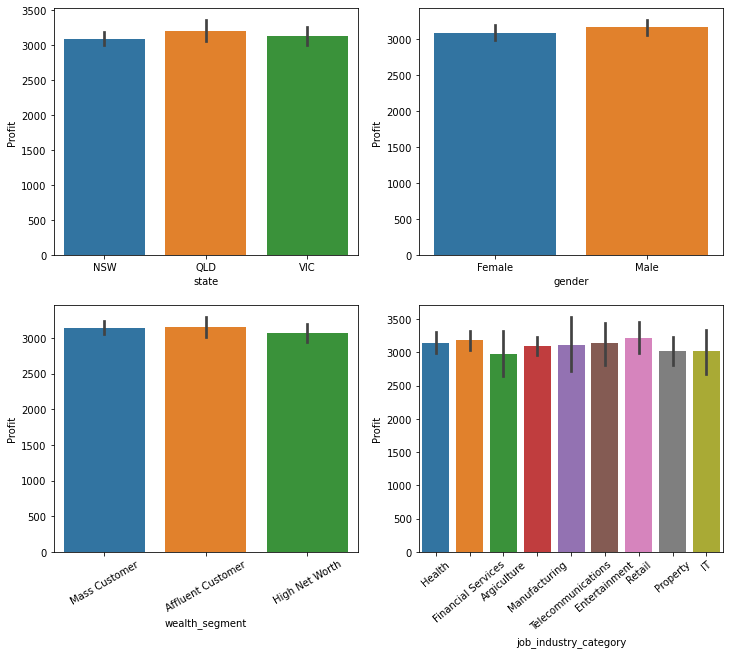

In [189]:
plt.figure(figsize=(12,10))
plt.subplot(221);sns.barplot('state','Profit',data=clean)  
plt.subplot(222);sns.barplot('gender','Profit',data=clean) 
plt.subplot(223);sns.barplot('wealth_segment','Profit',data=clean)
plt.xticks(rotation=30)
plt.subplot(224);sns.barplot('job_industry_category','Profit',data=clean)
plt.xticks(rotation=40)
plt.show()

In [190]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82


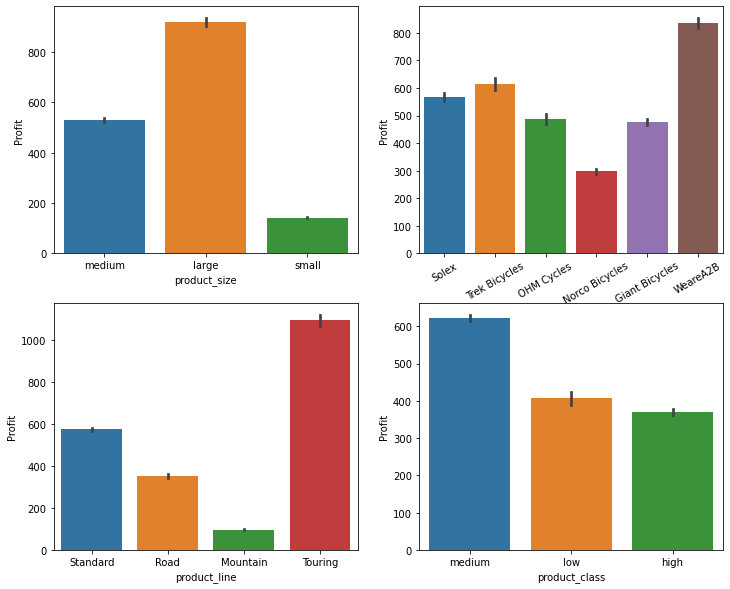

In [194]:
plt.figure(figsize=(12,10))
plt.subplot(221);sns.barplot('product_size','Profit',data=trans)  
plt.subplot(222);sns.barplot('brand','Profit',data=trans)
plt.xticks(rotation=30)
plt.subplot(223);sns.barplot('product_line','Profit',data=trans)
plt.subplot(224);sns.barplot('product_class','Profit',data=trans)
plt.show()